# **Basic Libraries**

In [1]:
import pandas as pd
import numpy as np

# **Importing Dataset**

In [2]:
df = pd.read_excel('P556.xlsx')

In [3]:
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


# **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [5]:
# Getting some statestical information
df.describe(include = 'all')

,title,rating,body
count,1440,1440.000000,1440
unique,1351,NaN,1440
top,Value for money,NaN,Very disappointed with the overall performance...
freq,16,NaN,1
mean,NaN,3.173611,NaN
std,NaN,1.584453,NaN
min,NaN,1.000000,NaN
25%,NaN,1.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,5.000000,NaN


In [6]:
# Checking Missing values

df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [7]:
# Frequency of ratings

df['rating'].value_counts()

rating
5    419
1    386
4    310
3    199
2    126
Name: count, dtype: int64

# **User define function for creating sentiment column**

In [8]:
def sentiment(text):
  if text <=2:
    return 'negative'
  elif text == 3:
    return 'neutral'
  else:
    return 'positive'

In [9]:
# Adding sentiment variable from the rarting values

df['sentiment'] = df.rating.apply(sentiment)

In [10]:
df

,title,rating,body,sentiment
0,Horrible product,1,Very disappointed with the overall performance...,negative
1,Camera quality is not like 48 megapixel,3,Camera quality is low,neutral
2,Overall,4,"Got the mobile on the launch date,Battery must...",positive
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,negative
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",negative
...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,positive
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",negative
1437,Good value for money,5,Battery life is good but camera clarity could ...,positive
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",negative


In [11]:
# Adding length column whitch says every row's text length

df['length'] = df.body.apply(len)

In [12]:
df

,title,rating,body,sentiment,length
0,Horrible product,1,Very disappointed with the overall performance...,negative,59
1,Camera quality is not like 48 megapixel,3,Camera quality is low,neutral,21
2,Overall,4,"Got the mobile on the launch date,Battery must...",positive,403
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,negative,377
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",negative,179
...,...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,positive,16
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",negative,188
1437,Good value for money,5,Battery life is good but camera clarity could ...,positive,98
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",negative,207


In [13]:
# Freauency of sentiments

df.sentiment.value_counts()

sentiment
positive    729
negative    512
neutral     199
Name: count, dtype: int64

# **Visualization**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Sentiment Count')

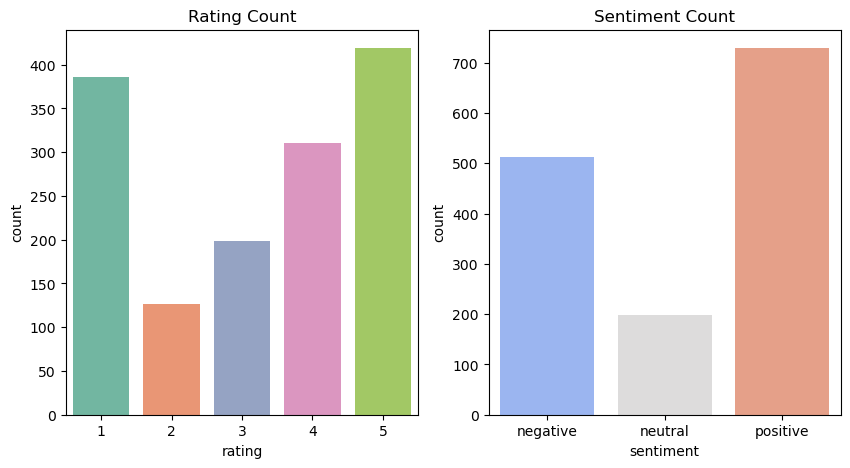

In [15]:
# count plot for frequency of rating and sentiment variables

plt.figure(figsize = (10,5))
plt.subplot (1,2,1)
plt.title('Rating Count')
sns.countplot(x = 'rating', data = df , palette = 'Set2')
plt.subplot(1,2,2)
sns.countplot(x = 'sentiment', data = df, palette = 'coolwarm')
plt.title('Sentiment Count')

array([[<Axes: title={'center': 'negative'}>,
        <Axes: title={'center': 'neutral'}>],
       [<Axes: title={'center': 'positive'}>, <Axes: >]], dtype=object)

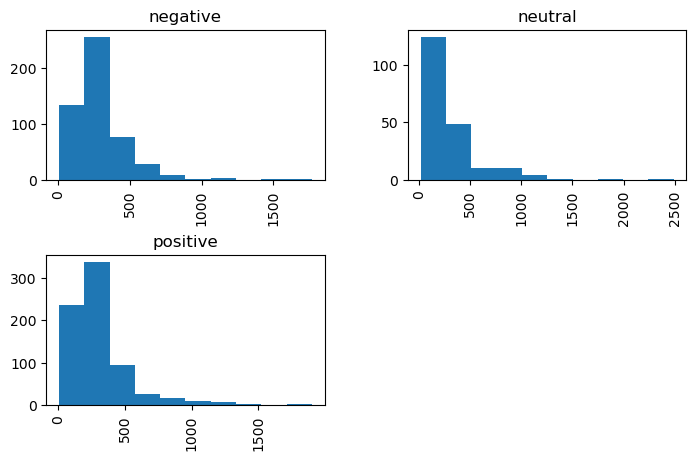

In [16]:
# sentiment wise frequency of text length

df.hist(column = 'length', by = 'sentiment', bins = 10, figsize = (8,5))

In [17]:
# separate sentiment class for visualize wordcloud

positive = df[df['sentiment'] =='positive']
negative = df[df['sentiment'] =='negative']
neutral = df[df['sentiment'] =='neutral']

In [18]:
positive

,title,rating,body,sentiment,length
2,Overall,4,"Got the mobile on the launch date,Battery must...",positive,403
14,Good one in this price segment.,5,Just unboxed the phone.Seems to be a better on...,positive,229
19,Perfect phone with this price,5,"This is perfect phone, good speed, decent spec...",positive,153
28,It's a budget package. A good phone to buy in ...,5,A very satisfying experience with the device ...,positive,780
33,Everything is just lit at this price🔥 . No com...,5,It's a real monster. Everything is awesome fro...,positive,376
...,...,...,...,...,...
1429,Best mobile in this price segment,5,Samsung M12 is best at this price. Camera qual...,positive,208
1430,Best budget Phone for parents,4,"Good performance,Good sound quality for phone ...",positive,155
1435,Excellent mobile,5,Excellent mobile,positive,16
1437,Good value for money,5,Battery life is good but camera clarity could ...,positive,98


In [19]:
negative

,title,rating,body,sentiment,length
0,Horrible product,1,Very disappointed with the overall performance...,negative,59
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,negative,377
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",negative,179
5,Too much lagging and slow,1,I will never purchase Samsung phones. Phone is...,negative,102
6,Worst samsung mobile ever,1,This is worst samsung mobile I have seen from ...,negative,179
...,...,...,...,...,...
1428,Completely dissatisfied with product never nev...,1,Totally unsatisfied new phone do not attach t...,negative,218
1433,Don't buy this mobile the processoring speed i...,1,W w it is good but the processing speed of thi...,negative,218
1434,Worst phone ever I use,1,Camara and video quality is not so good.Experi...,negative,207
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",negative,188


In [20]:
neutral

,title,rating,body,sentiment,length
1,Camera quality is not like 48 megapixel,3,Camera quality is low,neutral,21
23,"Not So impressive,okay okay.Little over price",3,The media could not be loaded.\n ...,neutral,2490
30,Good battery but average performance,3,Pros:1. The biggest advantage for buying this ...,neutral,872
42,Some marketing gimmicks...,3,"This phone has 90hz display, but I see a lag w...",neutral,450
47,Average phone with bloatware : Samsung India f...,3,Good phone in decent budget .Display could've ...,neutral,1018
...,...,...,...,...,...
1410,Samsung M12,3,Bad camera quality as well as display...don't ...,neutral,135
1420,Fair Product,3,"Fair product, not a great deal product or wort...",neutral,134
1427,Samsung fan.,3,Samsung is as usual known for good qualitymobi...,neutral,212
1431,Very bad product,3,Just 10 Days Completed my phone Speaker Damage...,neutral,71


# **Libraries for text cleaning**

In [21]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('punkt')

from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to C:\Users\AFTAB
[nltk_data]     MOMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AFTAB
[nltk_data]     MOMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\AFTAB
[nltk_data]     MOMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\AFTAB
[nltk_data]     MOMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AFTAB
[nltk_data]     MOMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **User define function for wordcloud**

In [22]:
def wrdcld(data,title):
  text = ' '.join(data['body'])
  text = text.lower()
  stop = STOPWORDS

  wc = WordCloud(background_color = 'white', stopwords = stop)
  wc.generate(text)
  plt.figure(figsize = (10,5))
  plt.imshow(wc)
  axis = plt.gca() # Get the current axes

  rect = patches.Rectangle(
        (0, 0), 1, 1, transform=axis.transAxes,  # full size of axis
        linewidth=3, edgecolor='black', facecolor='none'
    )
  axis.add_patch(rect)
  plt.axis('off')
  plt.title(title)

# **WORDCLOUD**

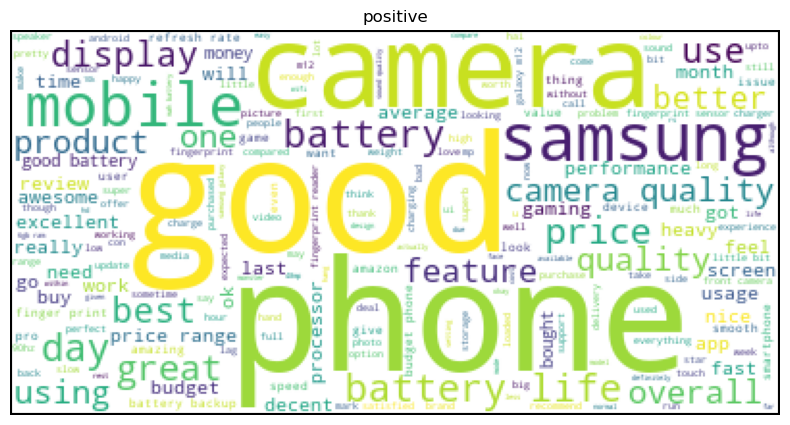

In [23]:
wrdcld(positive, 'positive')

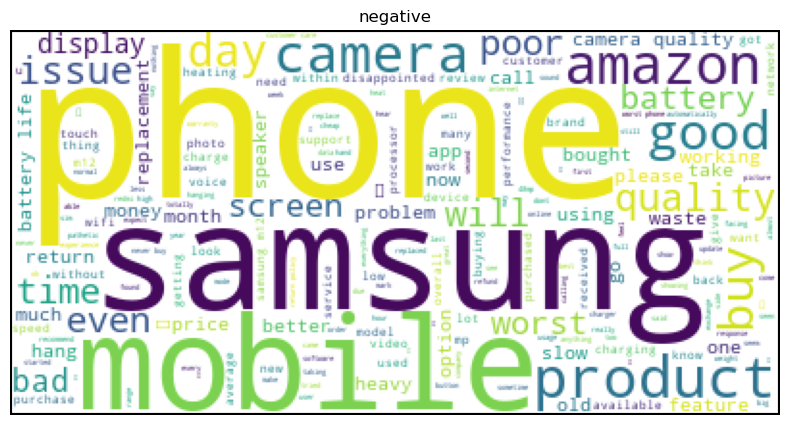

In [24]:
wrdcld(negative, 'negative')

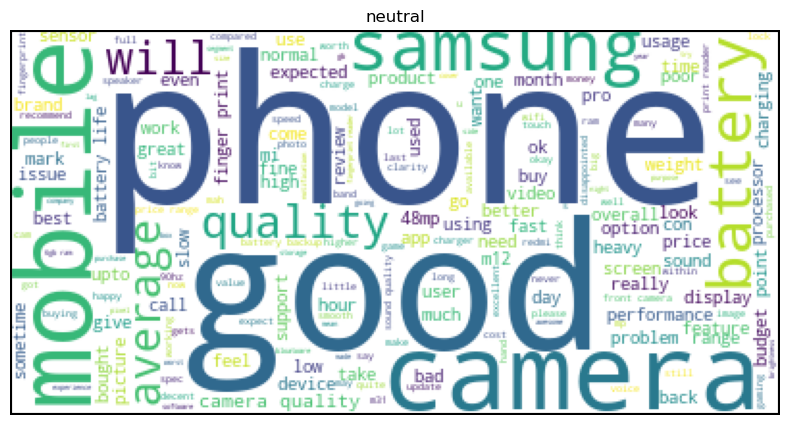

In [25]:
wrdcld(neutral, 'neutral')

In [26]:
# cotractions for cleaning

!pip install contractions

In [27]:
# cleaning libraries

import contractions
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [28]:
# Assigning Object

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# **text cleaning with user define function for Model building**

In [29]:
def preprocess_text(text):
  # lowercase
  text = text.lower()

  # remove non ASCII keys
  text = re.sub(r'[^\x00-\x7F]+', '',text)

  # remove Numbers
  text = re.sub(r'\d+', '', text)

  # remove Puntuations
  text = text.translate(str.maketrans('','',string.punctuation))

  # expand contrations
  text = contractions.fix(text)

  # remove extra spaces
  text = re.sub('\s+', ' ', text).strip()

  # tokenize
  tokens = nltk.word_tokenize(text)

  # remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  # lemmatize
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # join token back into string
  text = ' '.join(tokens)

  return text

In [30]:
# applying text cleaning function on categoricol column and creates 2 new columns

df['cleaned_title'] = df.title.apply(preprocess_text)
df['cleaned_body'] = df.body.apply(preprocess_text)

In [31]:
df

,title,rating,body,sentiment,length,cleaned_title,cleaned_body
0,Horrible product,1,Very disappointed with the overall performance...,negative,59,horrible product,disappointed overall performance samsung
1,Camera quality is not like 48 megapixel,3,Camera quality is low,neutral,21,camera quality like megapixel,camera quality low
2,Overall,4,"Got the mobile on the launch date,Battery must...",positive,403,overall,got mobile launch datebattery must appreciated...
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,negative,377,big,work ghz wifi frequency ghz old school camera ...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",negative,179,put money somewhere else,worth buyingfaulty software poor display quali...
...,...,...,...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,positive,16,excellent mobile,excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",negative,188,never expected samsung,mobile performance poor never buy one product ...
1437,Good value for money,5,Battery life is good but camera clarity could ...,positive,98,good value money,battery life good camera clarity could little ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",negative,207,unreal whitish display,bad product highly dissatisfied specifically c...


# **concatinating cleaned categorical variables**

In [32]:
df['cleaned_title_body'] = df['cleaned_title'] + df['cleaned_body']

In [33]:
df


,title,rating,body,sentiment,length,cleaned_title,cleaned_body,cleaned_title_body
0,Horrible product,1,Very disappointed with the overall performance...,negative,59,horrible product,disappointed overall performance samsung,horrible productdisappointed overall performan...
1,Camera quality is not like 48 megapixel,3,Camera quality is low,neutral,21,camera quality like megapixel,camera quality low,camera quality like megapixelcamera quality low
2,Overall,4,"Got the mobile on the launch date,Battery must...",positive,403,overall,got mobile launch datebattery must appreciated...,overallgot mobile launch datebattery must appr...
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,negative,377,big,work ghz wifi frequency ghz old school camera ...,bigwork ghz wifi frequency ghz old school came...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",negative,179,put money somewhere else,worth buyingfaulty software poor display quali...,put money somewhere elseworth buyingfaulty sof...
...,...,...,...,...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,positive,16,excellent mobile,excellent mobile,excellent mobileexcellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",negative,188,never expected samsung,mobile performance poor never buy one product ...,never expected samsungmobile performance poor ...
1437,Good value for money,5,Battery life is good but camera clarity could ...,positive,98,good value money,battery life good camera clarity could little ...,good value moneybattery life good camera clari...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",negative,207,unreal whitish display,bad product highly dissatisfied specifically c...,unreal whitish displaybad product highly dissa...


# **Model Building**

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
# Assigning data to x and y

x = df['cleaned_title_body']
y = le.fit_transform(df['sentiment'])


In [39]:
# spliting into train-test

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state= 0)


# **Logistic Regression Model**

In [40]:
# Logistic Regression model

pipeline_lgr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf',LogisticRegression(max_iter=500,random_state=0))
])

In [41]:
pipeline_lgr.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=500, random_state=0))])

In [42]:
pipeline_lgr_predict = pipeline_lgr.predict(x_test)

In [43]:
print('train accuracy:',pipeline_lgr.score(x_train,y_train))
print('test accuracy:',pipeline_lgr.score(x_test,y_test))

train accuracy: 0.8709150326797386
test accuracy: 0.7777777777777778


In [44]:
print('precision score:',precision_score(y_test, pipeline_lgr_predict, average='weighted'))
print('recall score:',recall_score(y_test, pipeline_lgr_predict, average='weighted'))
print('f1 score:',f1_score(y_test, pipeline_lgr_predict, average='weighted'))

precision score: 0.6590624115196376
recall score: 0.7777777777777778
f1 score: 0.7128376995198072


 # **Decision tree Model**

In [45]:
decision = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf',DecisionTreeClassifier(random_state=0))
])

In [46]:
decision.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier(random_state=0))])

In [47]:
decision_predict = decision.predict(x_test)

In [48]:
print('train accuracy:',decision.score(x_train,y_train))
print('test accuracy:',decision.score(x_test,y_test))

train accuracy: 1.0
test accuracy: 0.6759259259259259


In [49]:
print('precision score:',precision_score(y_test, decision_predict, average='weighted'))
print('recall score:',recall_score(y_test, decision_predict, average='weighted'))

precision score: 0.6567866900858704
recall score: 0.6759259259259259


# **random forest model**

In [50]:
forest = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf',RandomForestClassifier(n_estimators=500,random_state=0))
])

In [51]:
forest.fit(x_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf',
                 RandomForestClassifier(n_estimators=500, random_state=0))])

In [52]:
forest_predict = forest.predict(x_test)

In [53]:
print('train accuracy:',forest.score(x_train,y_train))
print('test accuracy:',forest.score(x_test,y_test))

train accuracy: 1.0
test accuracy: 0.7685185185185185


In [54]:
print('f1_score:',f1_score(y_test, forest_predict, average='weighted'))
print('recall_score:',recall_score(y_test, forest_predict, average='weighted'))
print('precision_score:',precision_score(y_test, forest_predict, average='weighted') )

f1_score: 0.7043892120571127
recall_score: 0.7685185185185185
precision_score: 0.6521139705882354


# **XGBoost**

In [55]:
xgb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf',XGBClassifier())
])

In [56]:
xgb.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [57]:
xgb_predict = xgb.predict(x_test)

In [58]:
print('train accuracy:',xgb.score(x_train,y_train))
print('test accuracy:',xgb.score(x_test,y_test))

train accuracy: 0.9983660130718954
test accuracy: 0.7685185185185185


In [59]:
print('f1_score:',f1_score(y_test, xgb_predict, average='weighted'))
print('recall_score:',recall_score(y_test, xgb_predict, average='weighted'))

f1_score: 0.7452227398734635
recall_score: 0.7685185185185185


# **Hypertuning**

In [60]:
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [61]:
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'clf__alpha': [0.001, 0.01, 0.1]
}

In [62]:
grid = GridSearchCV(pipeline, param_grid = params, cv = 9, verbose=1)

In [63]:
grid = GridSearchCV(pipeline, param_grid = params, cv = 7, verbose=1)

In [64]:
grid.fit(x_train,y_train)

Fitting 7 folds for each of 81 candidates, totalling 567 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.001, 0.01, 0.1],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__min_df': [1, 2, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=1)

In [65]:
grid.best_score_

0.7606427398545625

In [66]:
grid.best_params_

{'clf__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': (1, 2)}

In [67]:
best_params = grid.best_params_

In [68]:
best_params = {'clf__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': (1, 2)}

In [69]:
# Model with best parameters

model = pipeline.set_params(**best_params)

In [70]:
model.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, min_df=3, ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=0.1))])

In [71]:
model_predict = model.predict(x_test)

In [72]:
print('train accuracy:',model.score(x_train,y_train))
print('test accuracy:',model.score(x_test,y_test))

train accuracy: 0.9305555555555556
test accuracy: 0.7731481481481481


In [73]:
accuracy_score(y_test, model.predict(x_test))

0.7731481481481481

In [74]:
print('logisitc :',np.round(accuracy_score(y_test, pipeline_lgr_predict),4)*100)
print('decision tree :',np.round(accuracy_score(y_test, decision_predict),4)*100)
print('random forest :',np.round(accuracy_score(y_test, forest_predict),4)*100)
print('xgboost :',np.round(accuracy_score(y_test, xgb_predict),4)*100)
print('model :',np.round(accuracy_score(y_test, model_predict),4)*100)

logisitc : 77.78
decision tree : 67.58999999999999
random forest : 76.85
xgboost : 76.85
model : 77.31


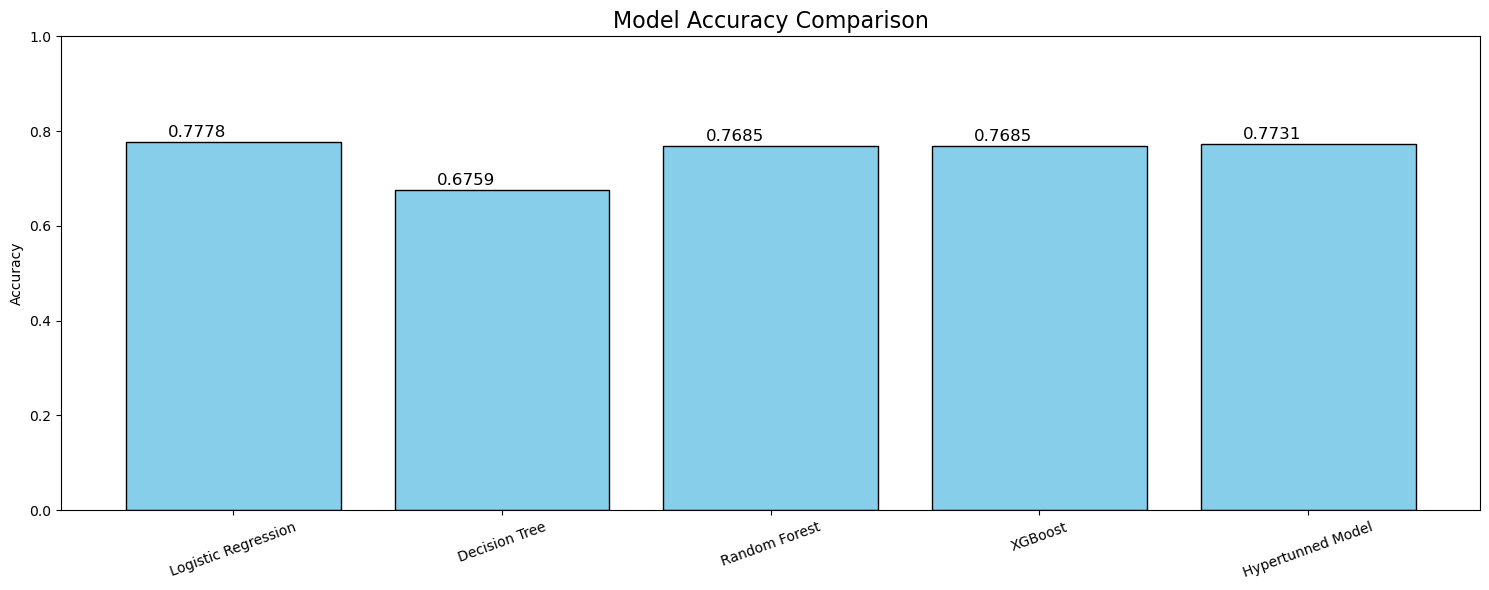

In [75]:
# Data for bar chart
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Hypertunned Model']
accuracies = [
    accuracy_score(y_test, pipeline_lgr_predict),
    accuracy_score(y_test, decision_predict),
    accuracy_score(y_test, forest_predict),
    accuracy_score(y_test, xgb_predict),
    accuracy_score(y_test, model_predict)
]

# Plot
plt.figure(figsize=(15, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval + 0.01, f'{yval:.4f}', ha='center', fontsize=12) # Adjusted text position and format

# Title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy') # Changed label to reflect the scale
plt.xticks(rotation=20)
plt.ylim(0, 1.0) # Adjusted y-limit for accuracy scores

plt.tight_layout()
plt.show()

In [76]:
import pickle

In [78]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)